In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Set up Libararies

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

# 2. Import Dataset

In [18]:
titanic_tr = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_test = pd.read_csv("/kaggle/input/titanic/test.csv")

# 3. EDA

In [19]:
titanic_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic_tr.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [21]:
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The train dataset has some of NaN values and some of object type of data

In [22]:
missing_data = titanic_tr.isnull().sum().sort_values(ascending=False)
missing_data

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [23]:
missing_percent = (titanic_tr.isnull().sum()/titanic_tr.isnull().count()).sort_values(ascending=False)
missing_percent

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

**The "Cabin" column in train data has NaN value more than 70%, "Age" with about 20%, "Embarked with about 0.002%**
> Need to decide how to handle those data -> we'll see after more EDA done

In [24]:
titanic_tr.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

I think it needs to categorize **"Age"** and **"Fare"** columns to predict more precisely\
Let's see how the data distributed briefly

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

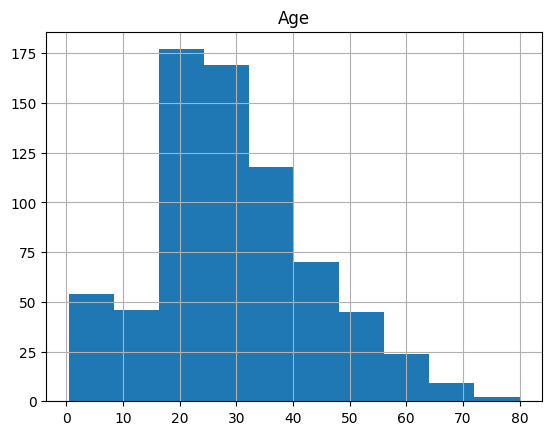

In [25]:
titanic_tr.hist("Age")

array([[<Axes: title={'center': 'Fare'}>]], dtype=object)

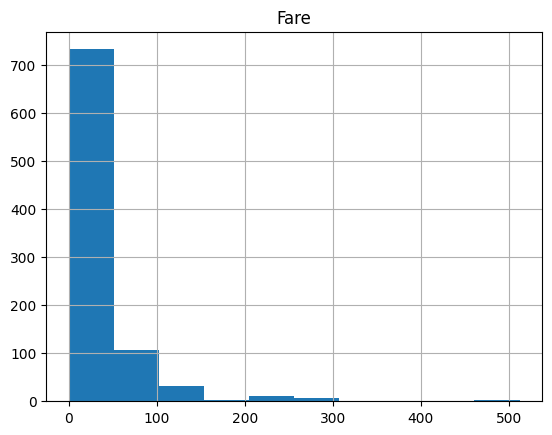

In [26]:
titanic_tr.hist("Fare")

#### I think the PassengerId, Name, and Ticket columns obviously do not effect on the servival, so let's drop these columns

In [27]:
titanic_d = titanic_tr.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
titanic_d.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

#### Let's see the survival and with columns that has less unique values

<Axes: xlabel='Sex', ylabel='Survived'>

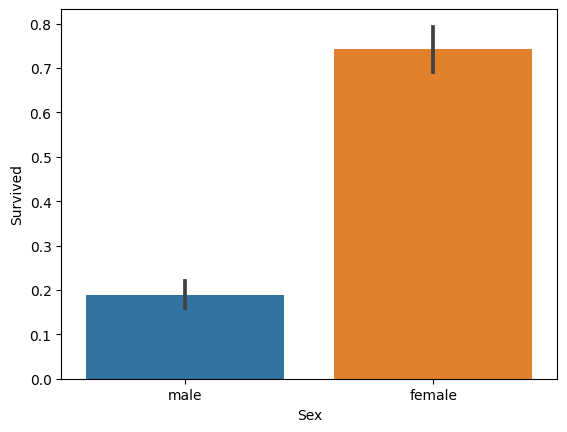

In [28]:
sns.barplot(titanic_d, x="Sex", y="Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

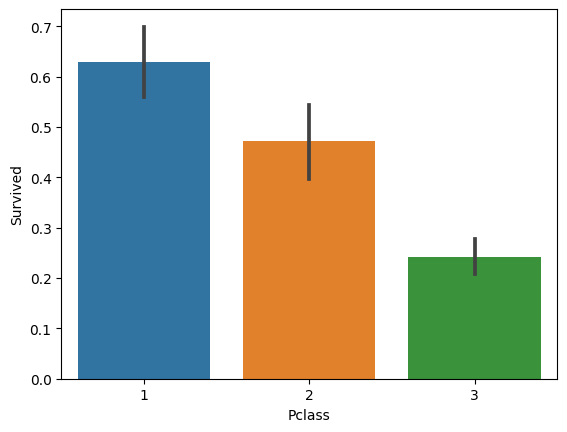

In [29]:
sns.barplot(titanic_d, x="Pclass", y="Survived")

<Axes: xlabel='SibSp', ylabel='Survived'>

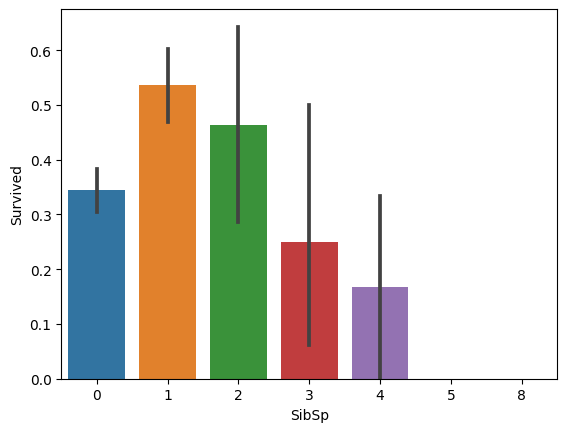

In [30]:
sns.barplot(titanic_d, x="SibSp", y="Survived")

<Axes: xlabel='Parch', ylabel='Survived'>

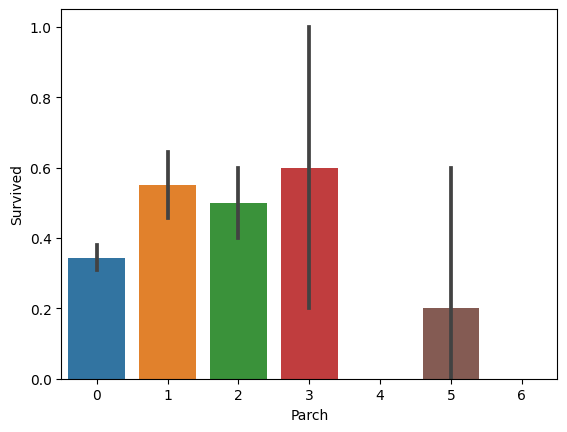

In [31]:
sns.barplot(titanic_d, x="Parch", y="Survived")

<Axes: xlabel='Embarked', ylabel='Survived'>

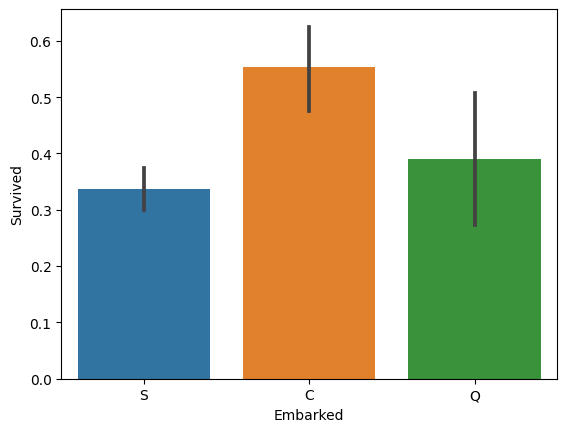

In [32]:
sns.barplot(titanic_d, x="Embarked", y="Survived")

**It looks like the people who are female, upper socio-economy status, has 1 sibling or spouse, 3 total family member including themselves, and embarked on Cherbourg has been survived**

### Before cleaning and preparing dataset, let's see the correlation of the features with the survival

<Axes: >

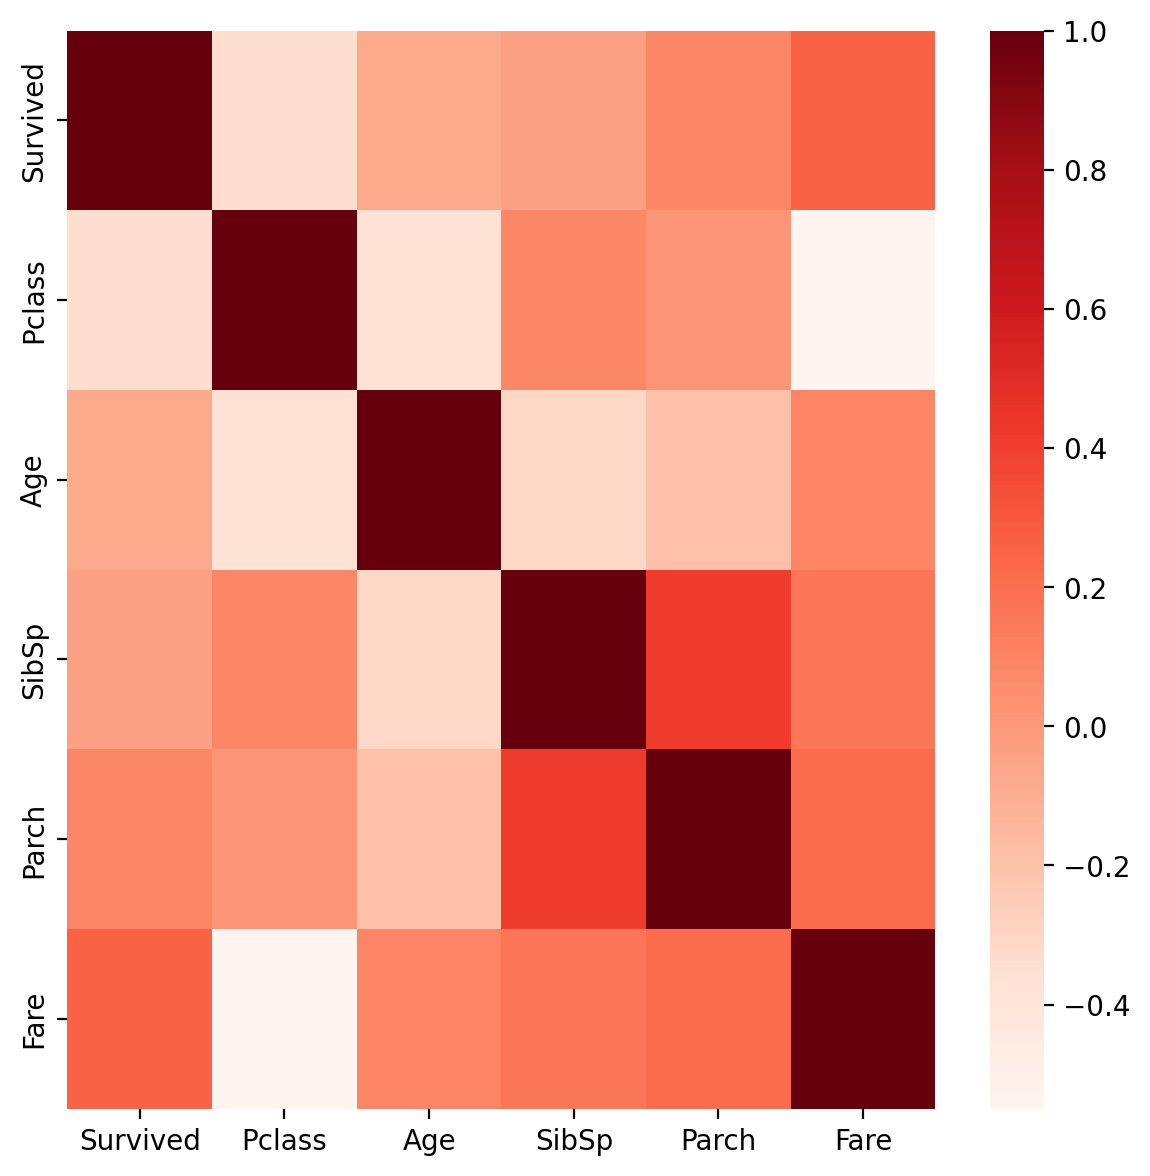

In [33]:
corr = titanic_d.corr(numeric_only=True)
plt.figure(figsize = (7, 7), dpi=200)
sns.heatmap(corr, cmap="Reds")

From above, we got to know that ther's correlation between Survival and Fare, Parch and SibSp

## 4. Cleaning and Preparing Data

#### **4.1. Age**

In [34]:
bins = [0, 18, 40, 60, 100]
labels = ['Minors', 'Youth', 'Middle-age', 'Seniors']
titanic_d['Age_Group'] = pd.cut(titanic_d['Age'], bins=bins, labels=labels, right=False)

titanic_d = titanic_d.drop(['Age'], axis=1)

In [35]:
titanic_d.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_Group
0,0,3,male,1,0,7.2500,NaN,S,Youth
1,1,1,female,1,0,71.2833,C85,C,Youth
2,1,3,female,0,0,7.9250,NaN,S,Youth
3,1,1,female,1,0,53.1000,C123,S,Youth
4,0,3,male,0,0,8.0500,NaN,S,Youth


In [36]:
titanic_d['Age_Group'].value_counts()

Age_Group
Youth         438
Middle-age    137
Minors        113
Seniors        26
Name: count, dtype: int64

In [37]:
titanic_d['Age_Group'].value_counts().idxmax()

'Youth'

In [38]:
# let's fill the NaN values with the most frequent value, Youth, in Age group
titanic_d['Age_Group'].fillna(titanic_d['Age_Group'].value_counts().idxmax(), inplace=True)
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    object  
 3   SibSp      891 non-null    int64   
 4   Parch      891 non-null    int64   
 5   Fare       891 non-null    float64 
 6   Cabin      204 non-null    object  
 7   Embarked   889 non-null    object  
 8   Age_Group  891 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 56.9+ KB


/tmp/ipykernel_33/3111654932.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_d['Age_Group'].fillna(titanic_d['Age_Group'].value_counts().idxmax(), inplace=True)


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='Survived'>

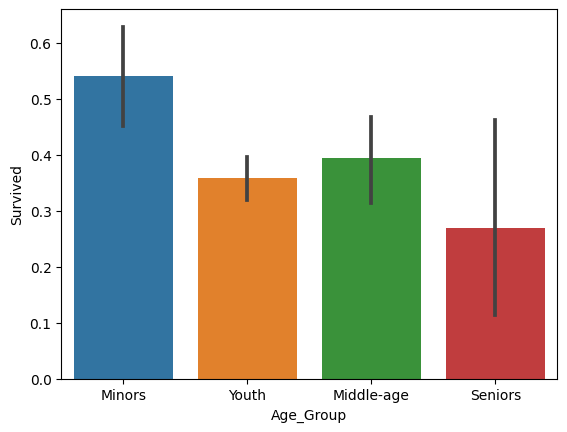

In [39]:
#Let's see the Age group and survival in a barplot
sns.barplot(titanic_d, x="Age_Group", y="Survived")

In [40]:
# Encode the category data type using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic_d.Age_Group = le.fit_transform(titanic_d.Age_Group.values)

In [41]:
titanic_d['Age_Group'].value_counts()

Age_Group
3    615
0    137
1    113
2     26
Name: count, dtype: int64

We can match those values like belows
> 0: Middle-age\
  1: Minors\
  2: Seniors\
  3: Youth

#### **4.2. Cabin**

In [42]:
#As the NaN values in Cabin columns is more than 70%, let's drop this column

titanic_d.drop(['Cabin'], axis=1, inplace=True)
titanic_d.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_Group'],
      dtype='object')

#### **4.3. Sex**

**As the valeus in Sex columns are the type of object, it needs to be encoded into numeric values**

In [43]:
titanic_d['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [44]:
# Encode the category data type using LabelEncoder

titanic_d.Sex = le.fit_transform(titanic_d.Sex.values)

In [45]:
titanic_d['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

We can match those values like belows
> 0: Female\
  1: Male

In [46]:
titanic_d['Sex'].dtype

dtype('int64')

#### **4.4. Embarked**

**Embarked column has NaN vlaue.\
And as the vlaues of Embarked are type of object, it needs to be encoded into numeric values**

##### **4.4.1 Missing Values**

In [47]:
titanic_d.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_Group'],
      dtype='object')

In [48]:
# Only 2 missing values (0.002%), so let's remove the rows with NaN in Embarked columns

titanic_d = titanic_d.dropna(subset=['Embarked'])
titanic_d.isnull().sum()

Survived     0
Pclass       0
Sex          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Age_Group    0
dtype: int64

In [49]:
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    int64  
 1   Pclass     889 non-null    int64  
 2   Sex        889 non-null    int64  
 3   SibSp      889 non-null    int64  
 4   Parch      889 non-null    int64  
 5   Fare       889 non-null    float64
 6   Embarked   889 non-null    object 
 7   Age_Group  889 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 62.5+ KB


The missing values, total 2 rows, had been perfectly removed!

##### **4.4.2 Object to Numerical Values**

In [50]:
titanic_d['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [51]:
titanic_d.Embarked = le.fit_transform(titanic_d.Embarked.values)

In [52]:
titanic_d['Embarked'].value_counts()

Embarked
2    644
0    168
1     77
Name: count, dtype: int64

We can match those values like belows
> 0: C\
  1: Q\
  2: S

#### **Let's check one more time the values are changed well**

In [53]:
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    int64  
 1   Pclass     889 non-null    int64  
 2   Sex        889 non-null    int64  
 3   SibSp      889 non-null    int64  
 4   Parch      889 non-null    int64  
 5   Fare       889 non-null    float64
 6   Embarked   889 non-null    int64  
 7   Age_Group  889 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 62.5 KB


There is no data type of object ! \
But I think it would be better to change all the data values to float for ML

In [54]:
train = titanic_d.astype(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    float64
 1   Pclass     889 non-null    float64
 2   Sex        889 non-null    float64
 3   SibSp      889 non-null    float64
 4   Parch      889 non-null    float64
 5   Fare       889 non-null    float64
 6   Embarked   889 non-null    float64
 7   Age_Group  889 non-null    float64
dtypes: float64(8)
memory usage: 62.5 KB


# 5. Split tain dataset using train_test_split

In [55]:
#Let's split the dataset into independant and dependant values

features = train.drop(columns='Survived', axis=1)
Y = train['Survived']

In [56]:
features.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Group
0,3.0,1.0,1.0,0.0,7.2500,2.0,3.0
1,1.0,0.0,1.0,0.0,71.2833,0.0,3.0
2,3.0,0.0,0.0,0.0,7.9250,2.0,3.0
3,1.0,0.0,1.0,0.0,53.1000,2.0,3.0
4,3.0,1.0,0.0,0.0,8.0500,2.0,3.0


In [57]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [58]:
#Let's split it using train_test_split with 0.2 test size
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=42)
print(f"The size of train set: {x_train.shape}")
print(f"The size of test set: {x_test.shape}")

The size of train set: (711, 7)
The size of test set: (178, 7)


# 6. Modeling and Training Dataset

## 6.1. Linear Regression

#### **6.1.1 Model training**

In [59]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [60]:
predicts = LR.predict(x_test)

#### **6.1.2 Evaluation**

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
LR_MAE = mean_absolute_error(y_test, predicts)
LR_MSE = mean_squared_error(y_test, predicts)
LR_RMSE = mean_squared_error(y_test, predicts, squared=False)
LR_R2 = r2_score(y_test, predicts)

print("MAE is", LR_MAE)
print("MSE is", LR_MSE)
print("RMSE is", LR_RMSE)
print("R2 socre is", LR_R2)

MAE is 0.2978523438262751
MSE is 0.14634413645003172
RMSE is 0.38254952156555067
R2 socre is 0.38349054390602255


It seems that Linear Regression has not good evaluation.\
Let's try other models 

## 6.2. Decision Tree

#### **6.2.1 Model training**

In [63]:
Tree = DecisionTreeClassifier(random_state=42)
Tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
Tr_Predicts = Tree.predict(x_test)

#### **6.2.1 Evaluation**

In [65]:
TR_Accuracy_Score = metrics.accuracy_score(y_test, Tr_Predicts)
TR_Jaccard_Score = metrics.jaccard_score(y_test, Tr_Predicts)
TR_F1_Score = metrics.f1_score(y_test, Tr_Predicts)


print("Accuracy Score is", TR_Accuracy_Score)
print("Jaccard Score is", TR_Jaccard_Score)
print("F1 Score is", TR_F1_Score)

Accuracy Score is 0.7752808988764045
Jaccard Score is 0.5555555555555556
F1 Score is 0.7142857142857142


It seems like a better model than LinearRegression

## 6.3. Logistic Regression

#### **6.3.1 Model Training**

In [66]:
# As the dataset is not big, I'll choose sovler as liblinear
LogisticR = LogisticRegression(solver='liblinear')
LogisticR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [67]:
Lo_predicts = LogisticR.predict(x_test)
Lo_predicts

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1.])

In [68]:
Lo_predicts_proba = LogisticR.predict_proba(x_test)
Lo_predicts_proba

array([[0.87879359, 0.12120641],
       [0.11786751, 0.88213249],
       [0.3206896 , 0.6793104 ],
       [0.78787319, 0.21212681],
       [0.1166563 , 0.8833437 ],
       [0.87924559, 0.12075441],
       [0.78787319, 0.21212681],
       [0.87837675, 0.12162325],
       [0.08299156, 0.91700844],
       [0.06264506, 0.93735494],
       [0.76615951, 0.23384049],
       [0.43302192, 0.56697808],
       [0.86887983, 0.13112017],
       [0.85540963, 0.14459037],
       [0.8779522 , 0.1220478 ],
       [0.87103383, 0.12896617],
       [0.48779501, 0.51220499],
       [0.82394113, 0.17605887],
       [0.7465061 , 0.2534939 ],
       [0.87877216, 0.12122784],
       [0.66950734, 0.33049266],
       [0.12338657, 0.87661343],
       [0.87435141, 0.12564859],
       [0.53896224, 0.46103776],
       [0.87869272, 0.12130728],
       [0.51557835, 0.48442165],
       [0.70515364, 0.29484636],
       [0.19998969, 0.80001031],
       [0.62854886, 0.37145114],
       [0.78988607, 0.21011393],
       [0.

#### **6.3.2 Evaluation**

In [69]:
Lo_Accuracy_Score = metrics.accuracy_score(y_test, Lo_predicts)
Lo_Jaccard_Score = metrics.jaccard_score(y_test, Lo_predicts)
Lo_F1_Score = metrics.f1_score(y_test, Lo_predicts)
Lo_Log_Loss = metrics.log_loss(y_test, Lo_predicts_proba)


print("Accuracy Score is", Lo_Accuracy_Score)
print("Jaccard Score is", Lo_Jaccard_Score)
print("F1 Score is", Lo_F1_Score)
print("Log Loss is", Lo_Log_Loss)

Accuracy Score is 0.797752808988764
Jaccard Score is 0.5909090909090909
F1 Score is 0.7428571428571428
Log Loss is 0.4563849495763939


It looks like better than LinearRegression and worse than DecisionTree

## 6.4. SVM

#### **6.4.1 Model Training**

In [70]:
#I'm gonna use 'rbf' kernel as it has bad result in regression model.
#I think it means it doesn't have linear parttern
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train, y_train)

SVC()

In [71]:
SVM_predicts = SVM.predict(x_test)
SVM_predicts

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

#### **6.4.2 Evaluation**

In [72]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, SVM_predicts)
SVM_Jaccard_Score = metrics.jaccard_score(y_test, SVM_predicts)
SVM_F1_Score = metrics.f1_score(y_test, SVM_predicts)


print("Accuracy Score is", SVM_Accuracy_Score)
print("Jaccard Score is", SVM_Jaccard_Score)
print("F1 Score is", SVM_F1_Score)

Accuracy Score is 0.6797752808988764
Jaccard Score is 0.2597402597402597
F1 Score is 0.41237113402061853


It seems like it's not a good model

# 7. Compare the results and choose the right model

In [73]:
#Let's compare the evaluations by making table
N = None
Score = {'Linear Regression':[LR_MAE, LR_MSE, LR_RMSE, LR_R2, N, N, N, N],
         'Decision Tree': [N, N, N, N, TR_Accuracy_Score,TR_Jaccard_Score, TR_F1_Score, N ],
         'Logistic Regression': [N, N, N, N, Lo_Accuracy_Score, Lo_Jaccard_Score, Lo_F1_Score, Lo_Log_Loss],
         'SVM':[N, N, N, N, SVM_Accuracy_Score, SVM_Jaccard_Score, SVM_F1_Score, N]}
Report = pd.DataFrame(Score, index=['MAE', 'MSE', 'RMSE', 'R2','Accuracy','Jaccard', 'F1','Log Loss'])
Report

,Linear Regression,Decision Tree,Logistic Regression,SVM
MAE,0.297852,NaN,NaN,NaN
MSE,0.146344,NaN,NaN,NaN
RMSE,0.382550,NaN,NaN,NaN
R2,0.383491,NaN,NaN,NaN
Accuracy,NaN,0.775281,0.797753,0.679775
Jaccard,NaN,0.555556,0.590909,0.259740
F1,NaN,0.714286,0.742857,0.412371
Log Loss,NaN,NaN,0.456385,NaN


The evaluation of Logistic Regression is the best among models\
So I'm going to use Logistic Regression model to get the prediction of test file

# 8. Apply Model(Logistic Regression) to Test file

In [74]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 8.1 Preprocess Test by the same method of train file

In [75]:
# drop the columns
titanic_test = titanic_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
titanic_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [76]:
# label encoding on Age
titanic_test['Age_Group'] = pd.cut(titanic_test['Age'], bins=bins, labels=labels, right=False)
titanic_test = titanic_test.drop(['Age'], axis=1)

titanic_test['Age_Group'].value_counts()

Age_Group
Youth         209
Middle-age     68
Minors         41
Seniors        14
Name: count, dtype: int64

In [77]:
titanic_test['Age_Group'].fillna(titanic_test['Age_Group'].value_counts().idxmax(), inplace=True)
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     418 non-null    int64   
 1   Sex        418 non-null    object  
 2   SibSp      418 non-null    int64   
 3   Parch      418 non-null    int64   
 4   Fare       417 non-null    float64 
 5   Cabin      91 non-null     object  
 6   Embarked   418 non-null    object  
 7   Age_Group  418 non-null    category
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 23.6+ KB


/tmp/ipykernel_33/732426848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test['Age_Group'].fillna(titanic_test['Age_Group'].value_counts().idxmax(), inplace=True)


In [78]:
titanic_test.Age_Group = le.fit_transform(titanic_test.Age_Group.values)
titanic_test['Age_Group'].value_counts()

Age_Group
3    295
0     68
1     41
2     14
Name: count, dtype: int64

In [79]:
#drop the cabin column
titanic_test.drop(['Cabin'], axis=1, inplace=True)
titanic_test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_Group'], dtype='object')

In [80]:
#label encoding on Sex
titanic_test['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [81]:
titanic_test.Sex = le.fit_transform(titanic_test.Sex.values)
titanic_test['Sex'].value_counts()

Sex
1    266
0    152
Name: count, dtype: int64

In [82]:
#label encoding on embarked
titanic_test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [83]:
titanic_test.Embarked = le.fit_transform(titanic_test.Embarked.values)
titanic_test['Embarked'].value_counts()

Embarked
2    270
0    102
1     46
Name: count, dtype: int64

In [84]:
test = titanic_test.astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    float64
 1   Sex        418 non-null    float64
 2   SibSp      418 non-null    float64
 3   Parch      418 non-null    float64
 4   Fare       417 non-null    float64
 5   Embarked   418 non-null    float64
 6   Age_Group  418 non-null    float64
dtypes: float64(7)
memory usage: 23.0 KB


In [85]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    float64
 1   Sex        418 non-null    float64
 2   SibSp      418 non-null    float64
 3   Parch      418 non-null    float64
 4   Fare       418 non-null    float64
 5   Embarked   418 non-null    float64
 6   Age_Group  418 non-null    float64
dtypes: float64(7)
memory usage: 23.0 KB


/tmp/ipykernel_33/3809464291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


### 8.2 Apply Logistic Regression

In [86]:
result = LogisticR.predict(test)
result

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [87]:
# the dtype of submission file should be int
result = result.astype(int)

In [88]:
result.dtype

dtype('int64')

In [89]:
Id = pd.read_csv("/kaggle/input/titanic/test.csv")
output = pd.DataFrame({'PassengerId': Id.PassengerId, 'Survived':result})
output.to_csv('submission_ver2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# TAKEAWAY FROM THIS PROCESS
1. WHAT I LEARNED

    1.1 Why does Linear Regression show bad result?
    * Regression is the better process for predicting a continuous value. In this case, I have to predict the passenger would be survived(1) or not (0). It means I can guess if I use Linear Regression model, I'd expected bad result.

    1.2 How to handle the data values?
    * The missing values and Outlier would be the main points to be handled. In this notebook, I just handled the missing values and some categorizing. During this process, It needs to be considered how to handle missing values like drop or fill in, more precisely fill in with what
    

2. WHAT I NEED TO IMPROVE (QUESTIONS)

    2.1 How to preprocess the train and test dataset at one time?
    * I guess I have to use pipeline
    
    2.2 How to improve the model more precisely?
    * Guess need to regulate hyper parameters on each models. But by which standard?